In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
api_key = ""

<h1>Get crypto list</h1>

In [24]:
base_url = "https://data.messari.io/api/v2/assets"
headers_dict = {"x-messari-api-key": api_key}

In [25]:
response = requests.get(base_url, headers = headers_dict)
if response.status_code != 200:
    print("Error")
data = response.json()

In [26]:
list_cryptos = []
for _dict in data['data']:
    list_cryptos.append(_dict['symbol'])

In [27]:
list_cryptos

['BTC',
 'ETH',
 'BNB',
 'USDT',
 'XRP',
 'DOGE',
 'ADA',
 'DOT',
 'BCH',
 'LTC',
 'UNI',
 'LINK',
 'VET',
 'THETA',
 'USDC',
 'FIL',
 'XLM',
 'TRX',
 'SOL',
 'WBTC']

<h1>Get timeseries marketcap data for a specific token, for the last year</h1>

In [7]:
start_date = datetime.datetime(2020,4,20)
end_date = datetime.datetime(2021,4,21)

In [8]:
base_url = "https://data.messari.io/api/v1/assets"

assetKey = "/bnb/"

endpoint_url = "metrics/mcap.circ/time-series"

params_dict = {"start": int(datetime.datetime.timestamp(start_date)),
              "end": int(datetime.datetime.timestamp(end_date)),
              "interval": "1d"}

headers_dict = {"x-messari-api-key": api_key}

In [9]:
response = requests.get(base_url + assetKey + endpoint_url,
                        params = params_dict,
                        headers = headers_dict)

In [10]:
if response.status_code != 200:
    print("Error")
data_bnb = response.json()

In [11]:
bnb_marketcap = pd.DataFrame(data_bnb['data']['values'])

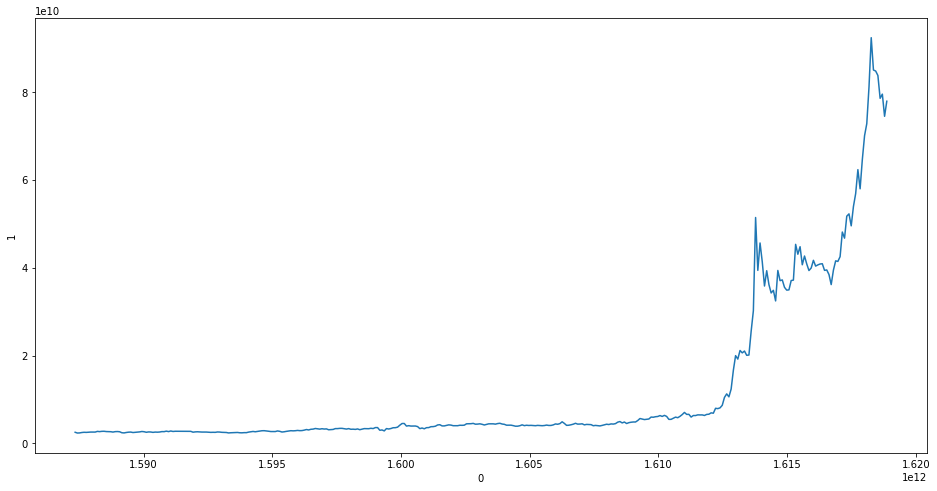

In [12]:
fig, axes = plt.subplots(1,1, figsize=(16,8))

sns.lineplot(x= bnb_marketcap[0], y= bnb_marketcap[1], ax=axes);

<h1>Get timeseries traffic data for marketplace linked to previous token</h1>

In [60]:
base_url = "https://data.messari.io/api/v1/markets/binance-BTC-USDT/metrics/real.vol/time-series"

params_dict = {"start": int(datetime.datetime.timestamp(start_date)),
              "end": int(datetime.datetime.timestamp(end_date)),
              "interval": "1d"}

headers_dict = {"x-messari-api-key": api_key}

response = requests.get(base_url,
                        headers = headers_dict,
                       params = params_dict)

if response.status_code != 200:
    print("Error")
data_binance_btc = response.json()

In [61]:
data_binance_btc = pd.DataFrame(data_binance_btc['data']['values'])

In [62]:
data_binance_btc[0] = pd.to_datetime(data_binance_btc[0], unit="ms")
bnb_marketcap[0] = pd.to_datetime(bnb_marketcap[0], unit="ms")

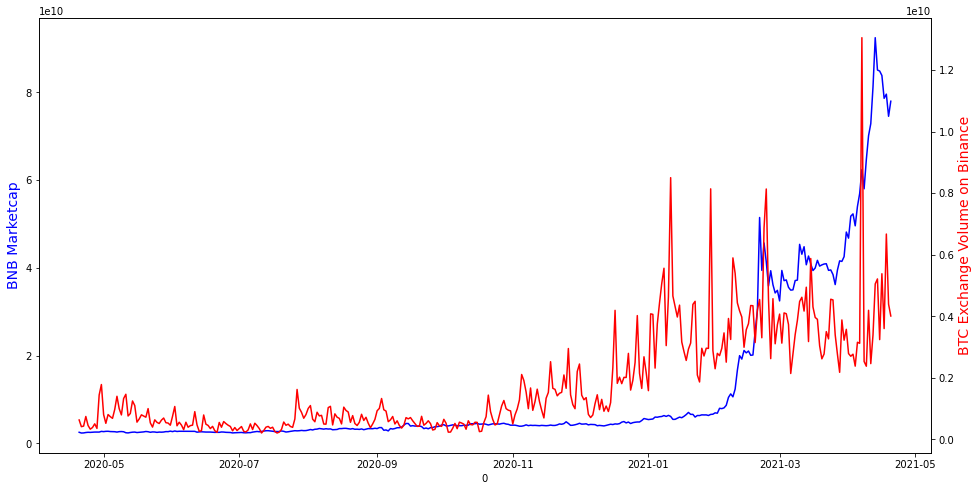

In [63]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

sns.lineplot(x= bnb_marketcap[0], y= bnb_marketcap[1], ax=ax, color= 'blue');
ax.set_ylabel("BNB Marketcap", color='blue', fontsize=14)
axbis = ax.twinx()
sns.lineplot(x= data_binance_btc[0], y= data_binance_btc[1], ax=axbis, color = "red");
axbis.set_ylabel("BTC Exchange Volume on Binance", color='red', fontsize=14);

In [70]:
base_url = "https://data.messari.io/api/v1/markets"

headers_dict = {"x-messari-api-key": api_key}

params_dict = {"page" : 780,
              "fields" : ["exchange_slug", "pair"]}

response = requests.get(base_url,
                        headers = headers_dict,
                       params = params_dict)

if response.status_code != 200:
    print("Error")
response.json()

{'status': {'elapsed': 839, 'timestamp': '2021-04-21T17:16:14.636490046Z'},
 'data': [{'exchange_slug': 'bittrex'},
  {'exchange_slug': 'yobit'},
  {'exchange_slug': 'yobit'},
  {'exchange_slug': 'huobi'},
  {'exchange_slug': 'kraken'},
  {'exchange_slug': 'exx'},
  {'exchange_slug': 'btcturk'},
  {'exchange_slug': 'bitforex'},
  {'exchange_slug': 'uniswap'},
  {'exchange_slug': 'bittrex'},
  {'exchange_slug': 'yobit'},
  {'exchange_slug': 'zb'},
  {'exchange_slug': 'coinex'},
  {'exchange_slug': 'yobit'},
  {'exchange_slug': 'huobi'},
  {'exchange_slug': 'hitbtc'},
  {'exchange_slug': 'gemini'},
  {'exchange_slug': 'binanceus'},
  {'exchange_slug': 'hitbtc'},
  {'exchange_slug': 'poloniex'}]}